<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_GeoMx_read_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GeoMx plotting read types
#Ran 20230518
#Sup Figure 6C

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import matplotlib.font_manager as fm

In [ ]:
# Load the Excel file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/GeoMx_CIP/segmentSummary_readTypes.csv')

# Select the desired columns
columns_to_plot = ["Raw reads", "Stitched reads", "Aligned reads", "Deduplicated reads"]


In [ ]:
import matplotlib.font_manager as fm

In [ ]:
font_path='/content/drive/MyDrive/arial/arial.ttf'

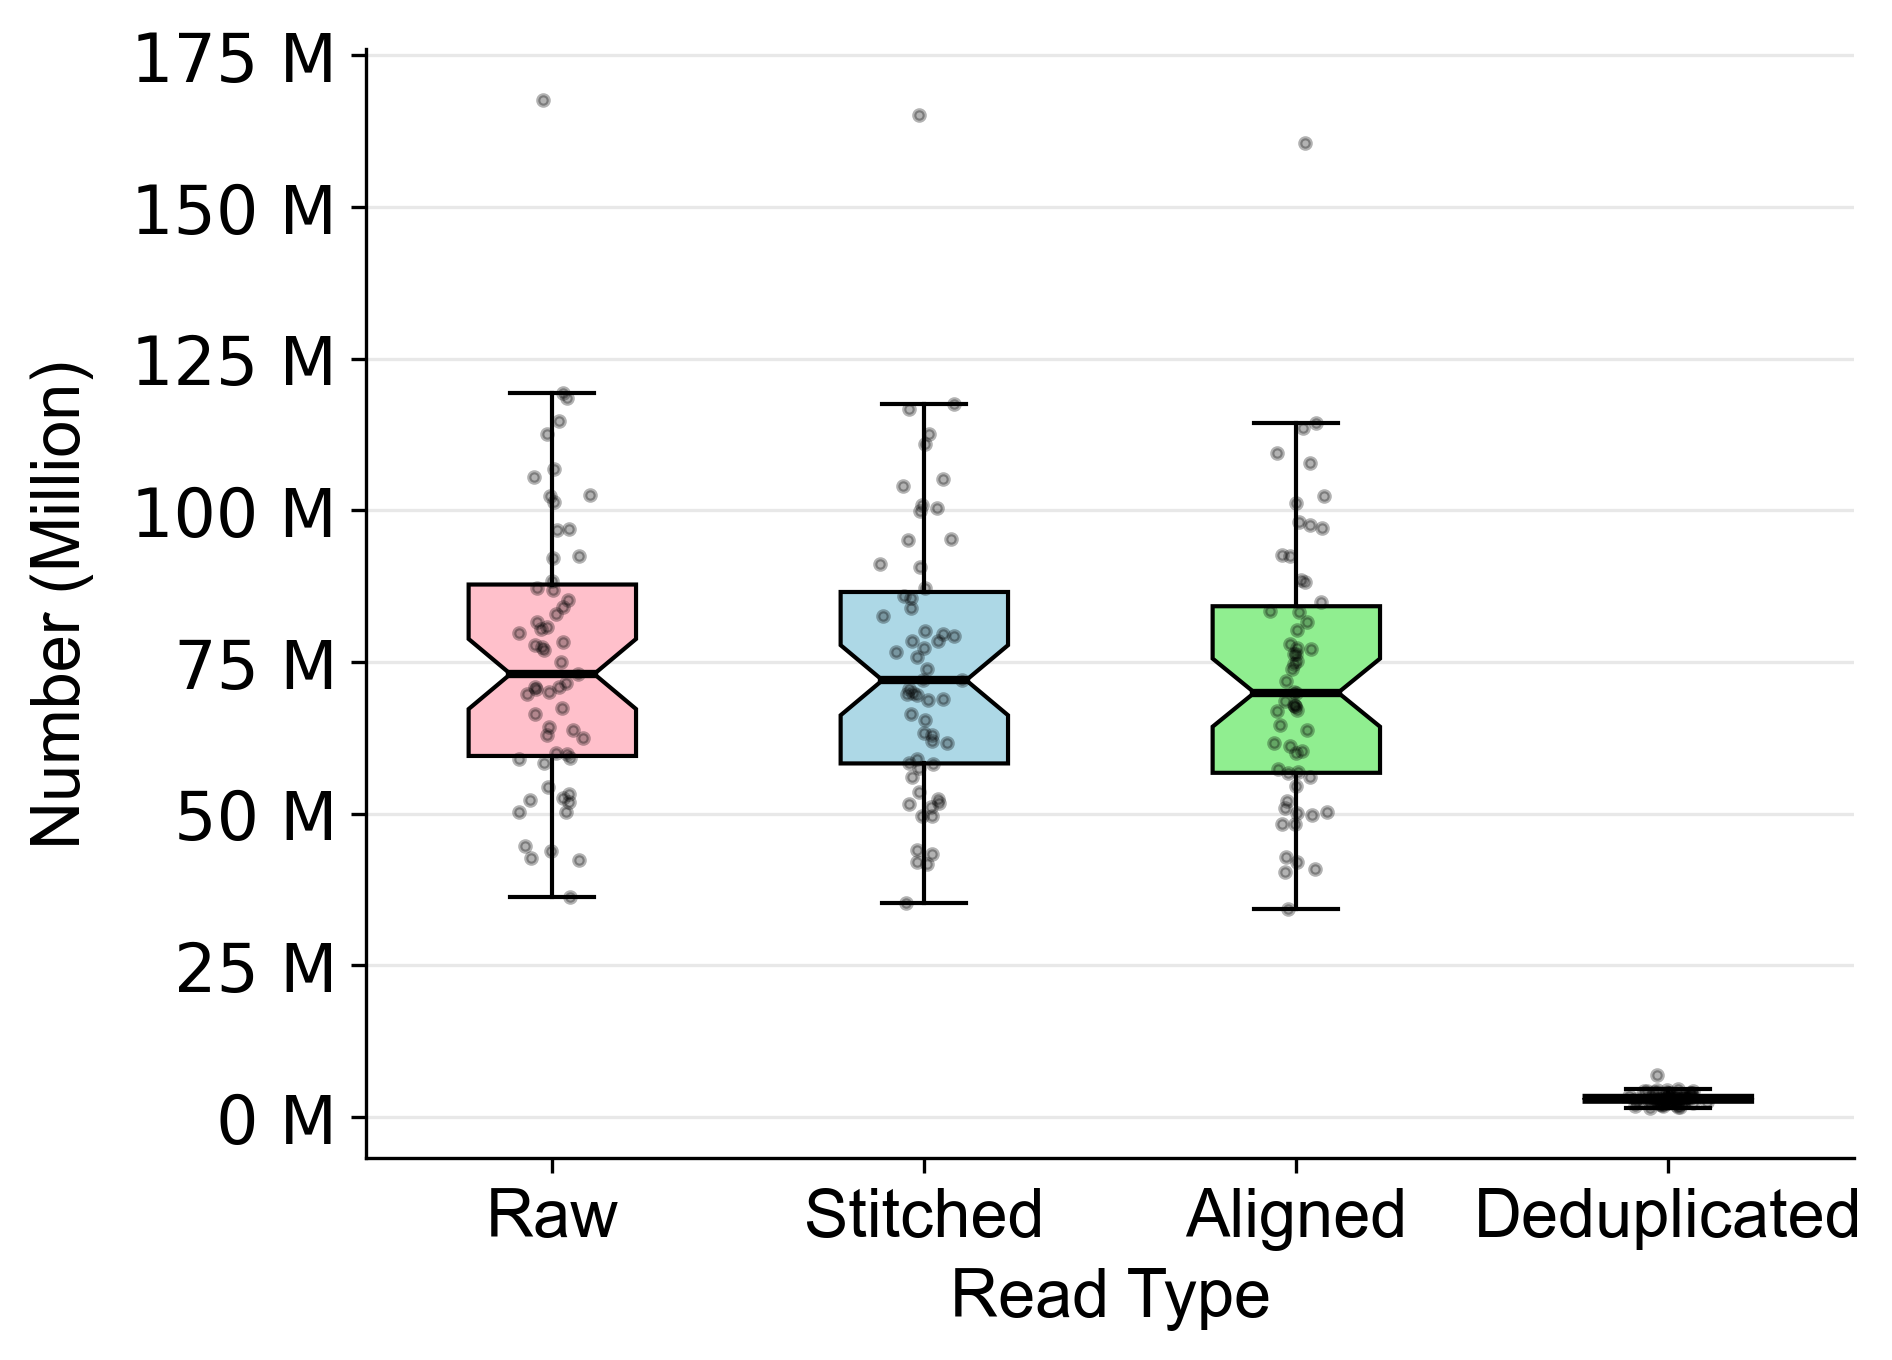

In [ ]:


# Select the desired columns
columns_to_plot = ["Raw", "Stitched", "Aligned", "Deduplicated"]

# Map the columns in the DataFrame to the new labels
column_mapping = {"Raw reads": "Raw", "Stitched reads": "Stitched",
                  "Aligned reads": "Aligned", "Deduplicated reads": "Deduplicated"}

# Prepare the data for the boxplot
data_to_plot = [df[col + " reads"].dropna() for col in columns_to_plot]

# Create a figure and a set of subplots with dpi=300
fig, ax = plt.subplots(dpi=300)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, notch=True, vert=1, whis=1.5)

colors = ['pink', 'lightblue', 'lightgreen', 'lightyellow']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o', markersize=0)


# Changing color and line width of medians
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Adding individual data points
for i in range(len(columns_to_plot)):
    y = data_to_plot[i]
    x = np.random.normal(1+i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', markersize=5, alpha=0.3)

# Import Arial from the provided path with a font size of 14
arial_font = fm.FontProperties(fname='/content/drive/MyDrive/arial/arial.ttf', size=16)

# Set the labels
ax.set_xticklabels(columns_to_plot, fontproperties=arial_font)

# Update the y-axis tick labels
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x * 1e-6: g} M'))
# Update the y-axis tick labels with font size 16
ax.tick_params(axis='y', labelsize=16)

# Set the labels with a font size of 16
plt.ylabel('Number (Million)', fontproperties=arial_font)
plt.xlabel('Read Type', fontproperties=arial_font)

# Remove the box around the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add horizontal grid lines
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)

# Show the plot
plt.show()
